# The purpose is to show the Pickles UVI

## Definitions of the libraries

In [1]:
import numpy as np
# Set up matplotlib and use a nicer set of plot parameters
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import astropy
from astropy.io import fits
from astropy.coordinates import SkyCoord, EarthLocation, AltAz

In [3]:
import pandas as pd
import os
import re

In [4]:
from astroquery.simbad import Simbad

In [5]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 8),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [6]:
top_pysynphot_data_dir=os.environ['PYSYN_CDBS']

In [7]:
import pysynphot as S
S.primary_area=6*1e4
S.binning=10.

## Defines where are the data

In [8]:
dir_star='calspec'
dir_nostar='grid'

In [9]:
dir_submodels=['agn','bpgs','extinction','jacobi','phoenix','bc95','bz77','galactic',\
               'k93models','pickles','bkmodels','ck04models','gunnstryker','kc96']

## where are the files

In [10]:
SEDfile_dir=os.path.join(top_pysynphot_data_dir,dir_nostar,dir_submodels[9],'dat_uvi')

In [11]:
filelist=os.listdir(SEDfile_dir) 

In [12]:
fits_files = [f for f in os.listdir(SEDfile_dir) if f.endswith('.fits')]

In [13]:
fits_files

['pickles_48.fits',
 'pickles_72.fits',
 'pickles.fits',
 'pickles_25.fits',
 'pickles_107.fits',
 'pickles_2.fits',
 'pickles_33.fits',
 'pickles_111.fits',
 'pickles_64.fits',
 'pickles_131.fits',
 'pickles_13.fits',
 'pickles_44.fits',
 'pickles_52.fits',
 'pickles_127.fits',
 'pickles_91.fits',
 'pickles_29.fits',
 'pickles_68.fits',
 'pickles_87.fits',
 'pickles_69.fits',
 'pickles_86.fits',
 'pickles_28.fits',
 'pickles_90.fits',
 'pickles_126.fits',
 'pickles_53.fits',
 'pickles_45.fits',
 'pickles_12.fits',
 'pickles_130.fits',
 'pickles_65.fits',
 'pickles_110.fits',
 'pickles_32.fits',
 'pickles_106.fits',
 'pickles_3.fits',
 'pickles_24.fits',
 'pickles_73.fits',
 'pickles_49.fits',
 'pickles_15.fits',
 'pickles_42.fits',
 'pickles_54.fits',
 'pickles_121.fits',
 'pickles_78.fits',
 'pickles_97.fits',
 'pickles_8.fits',
 'pickles_39.fits',
 'pickles_81.fits',
 'pickles_19.fits',
 'pickles_58.fits',
 'pickles_74.fits',
 'pickles_23.fits',
 'pickles_101.fits',
 'pickles_4.fits

In [14]:
fits_files.remove('pickles.fits')

## Find the star-names in the files

In [15]:
obj_headers = []
obj_files = []
for filename in fits_files:
    index=0
    if re.search('fits',filename):  #example of filename filter
        index+=1
        fullfilename = os.path.join(SEDfile_dir,filename)
        hdr = fits.getheader(fullfilename)
        obj_headers.append(hdr)
        obj_files.append(filename)

In [16]:
obj_headers[0]

SIMPLE  =                    T / Fits standard                                  
BITPIX  =                   16 / Bits per pixel                                 
NAXIS   =                    0 / Number of axes                                 
EXTEND  =                    T / File may contain extensions                    
DATE    = '2007-01-11T20:44:24' / Date FITS file was generated                  
IRAF-TLM= '15:44:40 (11/01/2007)' / Time of last modification                   
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
ORIGIN  = 'STScI-STSDAS/TABLES' / Tables version 2002-02-22                     
FILENAME= 'pickles_48.fits'    / name of file                                   
NEXTEND =                    1 / number of extensions in file                   
COMMENT1= 'spectral type: A0IV'                                                 
COMMENT2= 'metallicity: sola

In [17]:
#obj_names = []
#index=0
#for hdr in obj_headers: 
#        obj_name=obj_headers[index]['TARGETID']
#        obj_names.append(obj_name)
#        index+=1

In [18]:
#obj_names

In [19]:
fits_files[:5]

['pickles_48.fits',
 'pickles_72.fits',
 'pickles_25.fits',
 'pickles_107.fits',
 'pickles_2.fits']

In [20]:
obj_names2 = []
index=0
for thefile in fits_files:
    #thenames=re.findall('^bk_([a-z][0-9]+).fits$',thefile)
    thenames=re.findall('^(.*).fits$',thefile) 
    if(len(thenames)>0):
        obj_names2.append(thenames[0])
    else:
        print 'bad file ',thefile
    index+=1

In [21]:
print obj_names2

['pickles_48', 'pickles_72', 'pickles_25', 'pickles_107', 'pickles_2', 'pickles_33', 'pickles_111', 'pickles_64', 'pickles_131', 'pickles_13', 'pickles_44', 'pickles_52', 'pickles_127', 'pickles_91', 'pickles_29', 'pickles_68', 'pickles_87', 'pickles_69', 'pickles_86', 'pickles_28', 'pickles_90', 'pickles_126', 'pickles_53', 'pickles_45', 'pickles_12', 'pickles_130', 'pickles_65', 'pickles_110', 'pickles_32', 'pickles_106', 'pickles_3', 'pickles_24', 'pickles_73', 'pickles_49', 'pickles_15', 'pickles_42', 'pickles_54', 'pickles_121', 'pickles_78', 'pickles_97', 'pickles_8', 'pickles_39', 'pickles_81', 'pickles_19', 'pickles_58', 'pickles_74', 'pickles_23', 'pickles_101', 'pickles_4', 'pickles_35', 'pickles_117', 'pickles_62', 'pickles_63', 'pickles_116', 'pickles_34', 'pickles_100', 'pickles_5', 'pickles_22', 'pickles_75', 'pickles_59', 'pickles_18', 'pickles_80', 'pickles_38', 'pickles_9', 'pickles_79', 'pickles_96', 'pickles_120', 'pickles_55', 'pickles_43', 'pickles_14', 'pickles_83

In [22]:
obj_names=obj_names2

In [23]:
print obj_files

['pickles_48.fits', 'pickles_72.fits', 'pickles_25.fits', 'pickles_107.fits', 'pickles_2.fits', 'pickles_33.fits', 'pickles_111.fits', 'pickles_64.fits', 'pickles_131.fits', 'pickles_13.fits', 'pickles_44.fits', 'pickles_52.fits', 'pickles_127.fits', 'pickles_91.fits', 'pickles_29.fits', 'pickles_68.fits', 'pickles_87.fits', 'pickles_69.fits', 'pickles_86.fits', 'pickles_28.fits', 'pickles_90.fits', 'pickles_126.fits', 'pickles_53.fits', 'pickles_45.fits', 'pickles_12.fits', 'pickles_130.fits', 'pickles_65.fits', 'pickles_110.fits', 'pickles_32.fits', 'pickles_106.fits', 'pickles_3.fits', 'pickles_24.fits', 'pickles_73.fits', 'pickles_49.fits', 'pickles_15.fits', 'pickles_42.fits', 'pickles_54.fits', 'pickles_121.fits', 'pickles_78.fits', 'pickles_97.fits', 'pickles_8.fits', 'pickles_39.fits', 'pickles_81.fits', 'pickles_19.fits', 'pickles_58.fits', 'pickles_74.fits', 'pickles_23.fits', 'pickles_101.fits', 'pickles_4.fits', 'pickles_35.fits', 'pickles_117.fits', 'pickles_62.fits', 'pic

In [24]:
objames_and_objfiles = zip(obj_names, obj_files)

## Make a dictionary of filenames

In [25]:
OBJDict= {}
for obj,thefile in objames_and_objfiles:
    print obj,': '
    OBJDict[obj]=thefile
    print OBJDict[obj] 

pickles_48 : 
pickles_48.fits
pickles_72 : 
pickles_72.fits
pickles_25 : 
pickles_25.fits
pickles_107 : 
pickles_107.fits
pickles_2 : 
pickles_2.fits
pickles_33 : 
pickles_33.fits
pickles_111 : 
pickles_111.fits
pickles_64 : 
pickles_64.fits
pickles_131 : 
pickles_131.fits
pickles_13 : 
pickles_13.fits
pickles_44 : 
pickles_44.fits
pickles_52 : 
pickles_52.fits
pickles_127 : 
pickles_127.fits
pickles_91 : 
pickles_91.fits
pickles_29 : 
pickles_29.fits
pickles_68 : 
pickles_68.fits
pickles_87 : 
pickles_87.fits
pickles_69 : 
pickles_69.fits
pickles_86 : 
pickles_86.fits
pickles_28 : 
pickles_28.fits
pickles_90 : 
pickles_90.fits
pickles_126 : 
pickles_126.fits
pickles_53 : 
pickles_53.fits
pickles_45 : 
pickles_45.fits
pickles_12 : 
pickles_12.fits
pickles_130 : 
pickles_130.fits
pickles_65 : 
pickles_65.fits
pickles_110 : 
pickles_110.fits
pickles_32 : 
pickles_32.fits
pickles_106 : 
pickles_106.fits
pickles_3 : 
pickles_3.fits
pickles_24 : 
pickles_24.fits
pickles_73 : 
pickles_73.fit

## Plot the SED

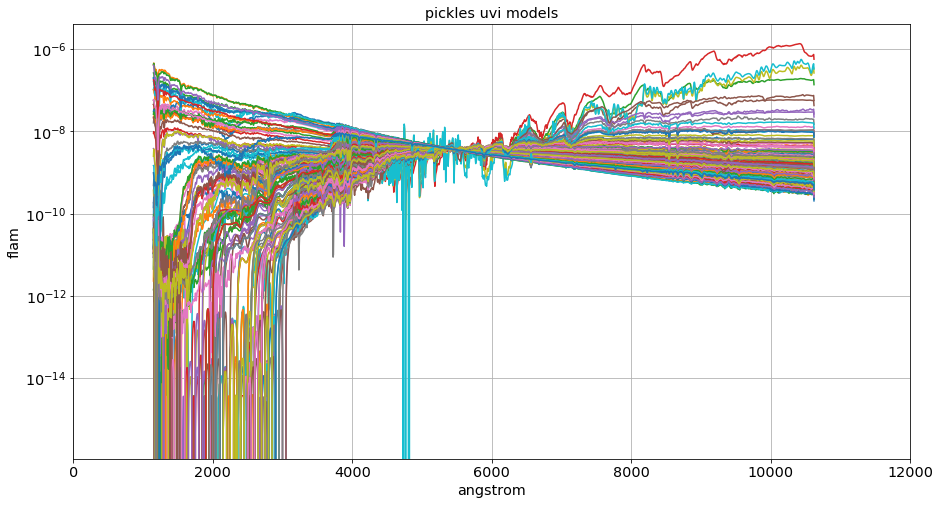

In [26]:
for keyobj in OBJDict:
    the_file=OBJDict[keyobj]
        
    selected_file=the_file
    selected_fullfile=os.path.join(SEDfile_dir,selected_file)
        
    sed=S.FileSpectrum(selected_fullfile)
        
    plt.semilogy(sed.wave,sed.flux,label=keyobj)
    plt.xlim(0, 12000)
    #plt.ylim(1e-23, 1e-6)
    plt.xlabel(sed.waveunits)
    plt.ylabel(sed.fluxunits)
    plt.grid(True)
    #plt.legend(loc='best')
#    plt.title(os.path.basename(S.Vega.name))
    plt.title("pickles uvi models")
    plt.savefig("pickles-uvi.png")